# Exercise 01: Mathematical Background

## Setting up your python environment

Before tackling the coding exercises, we need to setup the environment first. If you don't have Python on you computer, a quick way to install it is via `conda`. Please install [Miniconda](https://www.anaconda.com/docs/getting-started/miniconda/install) first. Then you can create a Python environment by
```
conda create -n cv2mvg python=3.10
```
Then you can activate the Python environment and install necessary pacakges by
```
conda activate cv2mvg
pip install -r requirements.txt
```

### Checking the environment
Run the following code cell to check if relevant packages were installed.

In [10]:
import numpy as np
print(f"NumPy version installed: {np.__version__}")

NumPy version installed: 1.26.4


### Load the necessary files

In [11]:
from exercise_code import perform_gaussian_elemination, meeting_point_linear, solve_linear_equation_SVD, get_null_vector

from tests import test_compute_meetingpoint,test_gaussian_elimination
from tests import generate_matrix, test_pseudo_inverse, generate_plt_data
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part I: Gaussian Eleminination

In this task you are to find an inverse of a matrix using Gaussian elimination:

Given a square matrix A, through application of elementary row operations bring the matrix $[A|I]$ to the form $[I|A −1 ]$.
If the matrix is degenerate you are to bring the matrix to the form where there is at least one zero row.

Go to file ```/exercise_code/gaussian_elemination.py``` and fill in the missing lines of code.

In [12]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
print(A)
A_inv = np.linalg.inv(A)
print(A_inv)
ops, A_inv = perform_gaussian_elemination(A)
print(A_inv)

for op in ops:
    print(op)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]
('S', 0, 1)
('M', 0, 0.3333333333333333)
('A', 1, 0, -1.0)
('M', 1, 1.4999999999999998)
('A', 0, 1, -1.3333333333333333)
SOLUTION


In [13]:
test_gaussian_elimination()

INFO:root:Congratulations: You passed the test case for the Gaussian elimination.
INFO:root:Congratulations: You passed the test case for the Gaussian elimination.
INFO:root:All tests of GaussianEliminationTest passed.
Tests passed: 2/2
INFO:root:Score: 100/100


100

## Part II: Meeting Point

Person A and Person B live in linear subspaces of $\mathbb{R}^m$. They want to meet to enjoy a couple of bottles of Spezi. You are to write a program to propose them a point in space where they can meet.

We need to find a common point for two subspaces. These subspaces are given by sets of points that span both of them.
Go to file ```/exercise_code/meeting_point.py``` and fill in the missing lines of code.

In [14]:
# Create the two subplanes in R^3
c = np.array([1, 0, 0])
a = np.array([0, 1, 0])
b = np.array([0, 0, 1])
PTS_a = [2*a+2*c, 3*a+c, 4*a+9*c, 5*a+c]
PTS_b = [2*b+c, 3*b+4*c, 4*b+c, 5*b+2*c]
PTS_a, PTS_b = np.array(PTS_a).T, np.array(PTS_b).T

In [15]:
output = meeting_point_linear([PTS_a, PTS_b])
print(output)

[[-1.00000000e+00]
 [ 2.84371996e-32]
 [ 4.71055163e-32]]


Check, whether you passed the test

In [16]:
test_compute_meetingpoint()

INFO:root:Congratulations: You passed the test case for the case of a line as intersection.
INFO:root:Congratulations: You passed the test case for the case of only zero as intersection.
INFO:root:All tests of MeetingPointTest passed.
Tests passed: 2/2
INFO:root:Score: 100/100


100

# Part III: The Moore-Penrose pseudo-inverse

To solve the linear system $Dx = b$ for an arbitrary (non-quadratic) matrix $D\in\mathbb{R}^{m\times n}$ of rank $r \leq \min(m,n)$, one can define a (generalized) inverse, also called the *Moore-Penrose pseudo-inverse* (refer to Chapter 1, last slide).

In this exercise we want to solve the linear system $Dx=b$. It is obvious that the set of all possible solutions can be denoted by $S = \{x^\star + v | v \in \text{kernel}(D)\}$.

To get farmiliar with computational linear algebra with Numpy, we will go through the following steps in this exercise

### Create some data
1. Generate a matrix $D$ using random functions with $m$ rows.
2. Introduce small additive Gaussian noise with standard deviation $\epsilon$ into $D$.
3. $b \in \mathbb{R}^{4}$ a vector whose components are all equal to 1
4. $x^* = [4,-3,2,-1]^T \in \mathbb{R}^{4}$ should be one possible solution of the linear system, i.e. for any row $[d_1,d_2,d_3,d_4]$ of $D$:
\begin{equation*}
		4 d_1 -3 d_2 + 2 d_3 - d_4 = \mathbb{1}
\end{equation*}

Go to file ```/tests/test_pseudo_inverse.py``` and fill in the missing lines of code.

In [21]:
import numpy as np
m = 4
x_star = np.array([4, -3, 2, -1])
b = np.ones(m)
D = generate_matrix(x_star, b, eps=1e-4)
b_ = D @ x_star
print(b_)

[0.99961956 1.00013387 0.99934612 1.00124861]


### Find the coefficient $x$ by solving $Dx = b$

1. Compute the SVD of the matrix D.
2. Compute the Moore-Penrose pseudo-inverse $\hat{D}$ 
3. Compute the coefficients $\hat{x}$, and compare it to the true solution $x^*$.
4. Try some large $m$. How is the precision impacted?

Go to file ```/exercise_code/pseudo_inverse.py``` and fill in the missing lines of code.

In [38]:
D_inv = np.linalg.pinv(D)
x_hat, D_inv_hat = solve_linear_equation_SVD(D, b)
delta_x = np.linalg.norm(x_star - x_hat)
print(f"Error of x: {delta_x}")
print(f"Error of D_inv: {np.linalg.norm(D_inv - D_inv_hat)}")

Error of x: 0.002892371636488242
Error of D_inv: 1.2994827337208943e-15


### Assume $m=3$ and there is no noise, we hence have infinitely many solutions.

1.  Solve again the linear equation $Dx=b$, but note that now $\text{rank}(D)=m$. 
    The function `solve_linear_equation_SVD` should be able to tackle it as well.

    Go to file ```/exercise_code/pseudo_inverse.py``` in case your code can not handle this case.
2.  Write a function to get a vector $v \in \text{kernel}(D)$ with $\| v\| =1$. 
    The set of all possible solutions is then $S = \{x + \lambda v | \lambda \in \mathbb{R}\}$.
    
    Go to file ```/exercise_code/get_null_vector.py``` and fill in the missing lines of code.


In [40]:
import numpy as np
m = 3
x_star = np.array([4, -3, 2, -1])
b = np.ones(m)
D = generate_matrix(x_star, b, eps=0)
b_ = D @ x_star
v = get_null_vector(D)
print(b_)
x_hat, _ = solve_linear_equation_SVD(D, b)
delta_x = (x_star - x_hat)
delta_x = delta_x / np.linalg.norm(delta_x)
print(f"Error of x: {delta_x}")
print(f"Kernel: {v}")

[1. 1. 1.]
Error of x: [ 0.84040091 -0.53928239 -0.04922964  0.02184627]
Kernel: [[ 0.84040091 -0.53928239 -0.04922964  0.02184627]]


In [41]:
test_pseudo_inverse()

INFO:root:Congratulations: Your matrix D is correct.
INFO:root:Congratulations: You passed the first test case for the pseudo inverse.
INFO:root:Congratulations: You passed the second test case for the pseudo inverse.
INFO:root:Congratulations: You passed the third test case for the pseudo inverse.
INFO:root:All tests of PseudoInverseTest passed.
Tests passed: 4/4
INFO:root:Score: 100/100


100

According to the last slide of Chapter 1, we know that the following statement holds:
	
$x_\text{min} = D^{+}b$ is among all minimizers of $\|Dx-b\|^{2}$ the one with the smallest norm $\|x\|$.

Let $\lambda \in \mathbb{R}$, $x_{\lambda} = x + \lambda v$ one possible solution, and $e_{\lambda} = \|D x_{\lambda} - b\|^2$ the associated error.

Display both graphs of $\|x_\lambda\|$ and $e_{\lambda}$ according to $\lambda \in \lbrace -100,\dots,100 \rbrace$, and observe that the statement indeed holds.

Go to file ```/tests/test_pseudo_inverse.py``` to generate the plot data.




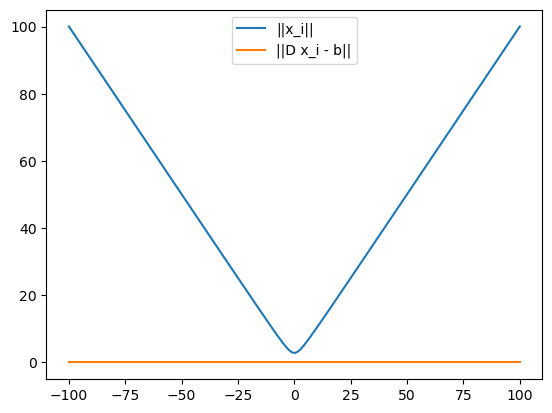

In [42]:

import matplotlib.pyplot as plt

scalings, values_norm, values_error = generate_plt_data()
plt.plot(scalings, values_norm, label="||x_i||")
plt.plot(scalings, values_error, label="||D x_i - b||")
plt.legend()
plt.show()

### Submit

In [43]:
from exercise_code.submit import submit_exercise

submit_exercise('../output/exercise01')

relevant folders: ['exercise_code']
notebooks files: ['mathematical_background.ipynb']
Adding folder exercise_code
Adding notebook mathematical_background.ipynb
Zipping successful! Zip is stored under: /Users/kai-zedeng/Library/CloudStorage/OneDrive-Personal/Dokumente/Study/Practical Exercise/IN2228_Computer_Vision_Multiple_View_Geometry/output/exercise01.zip
